In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
tr = pd.read_csv('../dataset/train.csv')

In [13]:
tr.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [18]:
cols_with_nans = [col for col in tr.columns if sum(tr[col].isna())>0]
tr.drop(columns=cols_with_nans, axis=1, inplace=True)

tr.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,How Old
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,18
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,45
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,20
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,106
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,21


import datetime 
datetime.datetime.now().year
tr['How Old'] = datetime.datetime.now().year-tr['YearBuilt']
tr.drop('YearBuilt', axis=1, inplace = True)

In [20]:
categorical_features=[]
for col in tr.columns:
    if tr[col].dtypes=='object':
        categorical_features.append(col)
print(categorical_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [21]:
label_encoder ={}
for i in categorical_features:
    label_encoder[i]=LabelEncoder()
    label_encoder[i].fit(tr[i])
    tr[i]=label_encoder[i].transform(tr[i])

In [22]:
tr.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,How Old
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,1,1,12,13,2,4,2,706,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500,18
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1,1,8,8,3,4,1,978,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500,45
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2002,1,1,12,13,2,4,2,486,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500,20
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1970,1,1,13,15,3,4,0,216,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000,106
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,1,1,12,13,2,4,2,655,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000,21


In [23]:
x_train = tr.drop(['Id','SalePrice'],inplace=False,axis=1)
y_train = tr.loc[: ,['SalePrice']]
print(x_train.shape)
print(y_train.shape)

(1460, 60)
(1460, 1)


In [24]:
def rmse(actual, prediction):
    error = actual - prediction
    error = error**2
    error = np.sum(error)
    error = error/np.float(len(prediction))
    error = np.sqrt(error)
    return error
    

In [25]:
val_mean = np.mean(y_train['SalePrice'])
y_train['mean'] = val_mean
y_mean = y_train[['mean']]
y_train.drop('mean', axis=1, inplace=True)
y_mean.rename(columns={'mean': 'SalePrice'}, inplace=True)
y_mean

,SalePrice
0,180921.19589
1,180921.19589
2,180921.19589
3,180921.19589
4,180921.19589
...,...
1455,180921.19589
1456,180921.19589
1457,180921.19589
1458,180921.19589


In [26]:
rmse(actual=y_train, prediction=y_mean)

SalePrice    79415.291886
dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred=lin_reg.predict(x_train)

In [29]:
model_rmse = rmse(actual=y_train, prediction=y_pred)

In [30]:
model_rmse

SalePrice    32006.804473
dtype: float64

In [32]:
test = pd.read_csv('../dataset/test.csv')
test.drop(columns=cols_with_nans, axis=1, inplace=True)
test.dropna(how='any', axis=0, inplace=True)

print(test.shape)
test.head()

(0, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [33]:
for i in categorical_features:
    test[i]=label_encoder[i].transform(test[i])

In [34]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [35]:
test['How Old'] = datetime.datetime.now().year-test['YearBuilt']
test.drop('YearBuilt', axis=1, inplace = True)

In [36]:
x_test = test.drop('Id', axis=1, inplace=False)
print(x_test.shape)

(0, 79)


In [37]:
pred = lin_reg.predict(x_test)

ValueError: Found array with 0 sample(s) (shape=(0, 79)) while a minimum of 1 is required.

In [38]:
pred

NameError: name 'pred' is not defined

In [39]:
from sklearn.model_selection import train_test_split

print(x_train.shape)
print(y_train.shape)

x_tr, x_valid, y_tr, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(x_tr.shape)
print(y_tr.shape)
print(x_valid.shape)
print(y_valid.shape)

(1460, 60)
(1460, 1)
(1168, 60)
(1168, 1)
(292, 60)
(292, 1)


In [40]:
cols_with_nans = [col for col in x_tr.columns if sum(x_tr[col].isna())>0]
x_tr.drop(columns=cols_with_nans, axis=1, inplace=True)

x_tr.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,How Old
254,20,3,8400,1,3,3,0,4,0,12,2,2,0,2,5,6,1957,1,1,8,8,3,2,1,922,0,392,1314,1,4,1,1314,0,0,1314,1,0,1,0,3,1,3,5,6,0,1,294,2,250,0,0,0,0,0,0,6,2010,8,4,64
1066,60,3,7837,1,0,3,0,4,0,8,2,2,0,5,6,7,1994,1,1,12,13,2,4,2,0,0,799,799,1,2,1,799,772,0,1571,0,0,2,1,3,1,3,7,6,1,2,380,2,0,40,0,0,0,0,0,5,2009,8,4,28
638,30,3,8777,1,3,3,0,4,0,7,1,2,0,2,5,7,1950,1,1,8,14,3,4,1,0,0,796,796,1,2,1,796,0,0,796,0,0,1,0,2,1,3,4,6,0,0,0,1,328,0,164,0,0,0,0,5,2008,8,4,111
799,50,3,7200,1,3,3,0,0,0,18,1,2,0,0,5,7,1950,1,1,13,14,3,4,0,569,0,162,731,1,0,1,981,787,0,1768,1,0,1,1,3,1,2,7,6,2,1,240,2,0,0,264,0,0,0,0,6,2007,8,4,84
380,50,3,5000,1,3,3,0,4,0,18,2,2,0,0,5,6,1950,1,1,3,14,3,4,0,218,0,808,1026,1,4,1,1026,665,0,1691,0,0,2,0,3,1,2,6,6,1,1,308,2,0,0,242,0,0,0,0,5,2010,8,4,97


In [42]:
y_tr.head()

,SalePrice
254,145000
1066,178000
638,85000
799,175000
380,127000


(0, 200)

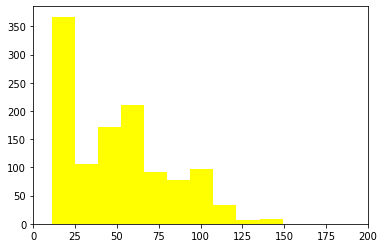

In [46]:
axes = plt.gca()
plt.hist(x_tr['How Old'],bins=10,color="yellow")
axes.set_xlim([0,200])

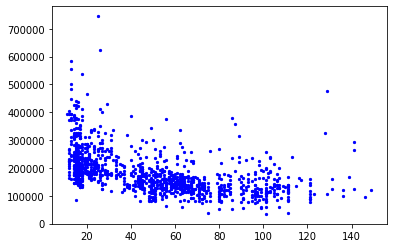

(0, 50000)

In [50]:
axes = plt.gca()
plt.scatter(x_tr['How Old'],y_tr['SalePrice'], s=5, c= "blue")
plt.show()
axes.set_xlim([0,100])
axes.set_ylim([0,50000])

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pre=lin_reg.predict(x_tr)

In [53]:
model_rmse = rmse(actual=y_tr, prediction=y_pre)
model_rmse

SalePrice    31604.712338
dtype: float64

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_valid,y_valid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
yp = lin_reg.predict(x_valid)

In [56]:
model_rmse = rmse(actual= y_valid, prediction=yp)
model_rmse

SalePrice    27778.838329
dtype: float64

In [57]:
x_tr.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

In [58]:
x_tr.dtypes

MSSubClass       int64
MSZoning         int32
LotArea          int64
Street           int32
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
OverallQual      int64
OverallCond      int64
YearRemodAdd     int64
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating          int32
HeatingQC        int32
CentralAir       int32
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual      int32
TotRmsAbvGrd     int64
Functional 

In [63]:
for i in x_tr.columns:
    print(i,x_tr[i].nunique())

MSSubClass 15
MSZoning 5
LotArea 890
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearRemodAdd 61
RoofStyle 6
RoofMatl 7
Exterior1st 15
Exterior2nd 16
ExterQual 4
ExterCond 5
Foundation 6
BsmtFinSF1 549
BsmtFinSF2 118
BsmtUnfSF 685
TotalBsmtSF 630
Heating 6
HeatingQC 5
CentralAir 2
1stFlrSF 657
2ndFlrSF 361
LowQualFinSF 20
GrLivArea 734
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
GarageCars 5
GarageArea 394
PavedDrive 3
WoodDeckSF 244
OpenPorchSF 188
EnclosedPorch 98
3SsnPorch 17
ScreenPorch 66
PoolArea 7
MiscVal 19
MoSold 12
YrSold 5
SaleType 9
SaleCondition 6
How Old 111


In [65]:
categorical_feat=[]
for i in x_tr.columns:
    values = (x_tr[i].nunique())
    if (values):
        categorical_feat.append(i)
print(categorical_feat) 
len(categorical_feat)       

    

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'How Old']


60

In [68]:
label_encode={}
for feature in  categorical_feat:
    label_encode[feature]=LabelEncoder()
    label_encode[feature].fit(x_tr[feature])
    x_tr[feature]=label_encode[feature].transform(x_tr[feature])
    

In [70]:
x_tr.loc[0:288, categorical_feat]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,How Old
0,5,3,271,1,3,3,0,4,0,5,2,2,0,5,6,4,53,1,1,12,13,2,4,2,312,0,67,162,1,0,1,121,204,0,455,1,0,2,1,3,1,2,6,6,0,2,202,2,0,47,0,0,0,0,0,1,2,8,4,7
360,9,3,196,1,0,3,0,1,0,11,2,2,0,6,5,5,28,1,1,12,13,3,4,1,342,0,47,179,1,0,1,154,0,0,53,1,0,1,0,2,1,3,3,6,1,2,139,2,0,0,0,0,40,0,0,5,1,8,4,32
828,5,3,870,1,1,2,0,1,2,4,2,2,0,5,4,4,17,0,4,9,10,3,4,2,63,101,0,253,1,4,1,321,256,0,612,0,1,2,1,3,1,3,5,3,0,2,195,2,225,0,0,0,49,0,0,5,3,8,0,43
1379,8,3,415,1,3,3,0,4,0,23,2,2,0,7,4,4,57,1,1,12,13,3,4,2,0,0,222,8,1,2,1,61,100,0,286,0,0,2,1,3,1,2,5,6,0,2,89,2,38,0,0,0,0,0,0,4,2,8,4,4
475,0,3,277,1,3,3,0,0,0,19,2,2,0,2,4,5,13,3,1,6,6,3,4,1,270,0,194,225,1,4,1,193,0,0,75,1,0,1,0,2,1,3,3,6,0,2,252,2,0,12,0,0,40,0,0,6,1,8,4,47
1247,8,3,679,1,0,3,0,4,0,11,2,2,0,7,5,4,26,1,1,6,6,3,4,1,216,0,280,252,1,4,1,234,0,0,97,1,0,1,0,3,1,3,4,6,0,3,366,2,0,0,0,0,0,0,0,4,4,8,4,34
57,5,3,616,1,0,3,0,0,0,5,2,2,0,5,6,4,54,1,1,12,13,2,4,2,0,0,468,164,1,0,1,123,208,0,463,0,0,2,1,3,1,2,5,6,0,2,212,2,0,55,0,0,0,0,0,7,0,8,4,6
637,14,4,112,1,3,3,0,4,0,17,2,2,1,0,4,3,4,1,1,13,14,3,4,1,0,0,452,135,1,4,1,94,71,0,282,0,0,2,0,3,2,2,5,6,0,1,24,2,0,0,0,0,0,0,0,10,3,8,4,56
1273,8,3,608,1,0,3,0,0,0,7,2,2,0,7,5,6,56,1,1,9,10,3,4,1,318,0,168,255,1,2,1,426,0,0,261,1,0,1,0,2,1,0,3,6,1,1,52,2,0,0,0,0,28,0,0,4,2,8,4,51
1026,0,3,370,1,3,3,0,4,0,12,1,2,0,2,4,4,10,1,1,8,6,3,4,1,306,0,336,398,1,4,1,380,0,0,216,1,0,1,0,3,1,3,4,6,2,2,134,2,0,0,0,0,18,0,0,3,4,8,4,50
